# Chapter 4 신경망 학습

신경망 학습에서 '학습'이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 신경망이 학습할 수 있도록 해주는 지표는 손실 함수인데, 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.

### 4.1.2 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 훈련 데이터(training data)와 시험 데이터(test data)로 나눠 학습과 실험을 수행하는 것이 일반적이다. 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾고, 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가한다. 훈련 데이터와 시험 데이터를 나눠야하는 이유는 우리가 원하는 것이 범용적으로 사용할 수 있는 모델이기 때문이다. 범용 능력이란 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력이다. 범용 능력을 획득하는 것이 기계학습의 최종 목표이다.

참고로 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라고 한다.

## 4.2 손실 함수

### 4.2.1 오차제곱합

가장 많이 쓰이는 손실 함수가 바로 오차제곱합이다. 신경망의 출력(신경망이 추정한 값)에서 정답 레이블 값을 빼준 것을 제곱한 것을 모두 더해준 뒤 2로 나눠주면 된다.

In [1]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

예를 들어 y는 신경망의 출력, t는 정답 레이블이다. 위에서처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 원-핫 인코딩이라고 한다.

In [3]:
def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)

오차제곱합을 파이썬으로 구현해보았다.

In [5]:
import numpy as np

In [7]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]
sum_squares_error(np.array(y),np.array(t))

0.09750000000000003

2일 확률이 가장 높다고 추정한 예시

In [8]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]
sum_squares_error(np.array(y),np.array(t))

0.5975

7일 확률이 가장 높다고 추정한 예시이다. 첫 번째 예의 손실 함수 출력이 더 작으며, 정답 레이블과의 오차도 작은 것을 알 수 있다. 즉, 오차제곱합 기준으로 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단할 수 있다.

### 4.2.2 교차 엔트로피 오차

또 다른 손실함수로서 교차 엔트로피 오차도 자주 이용한다. 신경망의 출력과 log(정답 레이블)을 곱한 것의 총합에 마이너스를 붙여주면 된다. 

In [9]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

y와 t는 넘파이 배열이다. 코드 마지막에서 np.log를 계산할 때 아주 작은 값인 델타를 더해준 이유는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문이다. 아주 작은 값을 더해 절대 0이 되지 않도록 방지한 것이다.

In [10]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [11]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 이 때 교차 엔트로피 오차는 약 0.51이다. 반면 정답일 때의 출력이 0.1인 경우, 교차 엔트로피 오차가 무려 2.3이다. 즉 오차가 더 작은 첫 번째 추정이 정답일 가능성이 높고, 이는 앞서 오차제곱합의 판단과 일치한다.

### 4.2.3 미니배치 학습

신경망 학습에서 훈련 데이터로부터 일부만 골라 학습을 수행할 수 있는데, 이 일부를 '미니배치'라고 한다. 가령 MNIST 데이터셋에서 60,000장의 훈련 데이터 중 100장을 무작위로 뽑아 그 100장만을 사용하여 학습할 수 있다. 이러한 학습 방법을 미니배치 학습이라고 한다.

In [12]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

In [13]:
print(x_train.shape)

(60000, 784)


In [14]:
print(t_train.shape)

(60000, 10)


MNIST 데이터셋을 불러왔다.

In [15]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice() 함수를 이용해 훈련 데이터에서 무작위로 10장만 빼냈다.

In [16]:
np.random.choice(60000,10)

array([27430, 10141, 21440, 10167, 50692, 48643, 41992, 44923,  3690,
       54106])

0 이상 60000 미만의 수 중에서 무작위로 10개를 골라내보았다. 이제 무작위로 선택한 이 인덱스를 사용해 미니배치를 뽑아내기만 하면 된다. 손실 함수도 이 미니배치로 계산한다.

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [17]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [18]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 위와 같이 구할 수 있다.

이 구현에서는 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다.
___
np.arange(batch_size)는 0부터 batch_sie-1까지 배열을 생성한다. y[np.arange(batch_size),t]는 각 데이터의 정답 레이블에 해당하는 신경망의 추력을 추출한다.

### 4.2.5 왜 손실 함수를 설정하는가?

'정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유는 미분 때문이다. 손실 함수의 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 반대로, 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 그러나 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않는다. 그래서 가중치 매개변수의 갱신은 거기서 멈춘다.

정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다. 

정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다. 반면 손실 함수의 값은 연속적으로 변화한다.

## 4.3 수치 미분

In [19]:
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h

함수를 미분하는 계산을 구현해보았다. 문제가 없어 보이지만, 실제로는 개선해야 할 점이 2개 있다. 먼저 10e-50이라는 작은 값을 이용할 때 반올림 오차 문제가 발생한다. 반올림 오차는 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기게 한다.

In [20]:
np.float32(1e-50)

0.0

1e-50을 float32형(32비트 부동소수점)으로 나타내면 이처럼 0.0이 된다. 미세한 값 h로 1e-50 대신 10의 -4승 정도의 값을 이용하면 좋은 결과를 얻는다고 알려져있다.
 
두 번째 개선은 함수 f의 차분(임의의 두 점에서의 함수 값들의 차이)과 관련한 것이다. 앞의 구현에서는 x+h와 x 사이의 함수 f의 차분을 계산하고 있지만, 이 계산에는 애초에 오차가 있다. 진정한 미분은 x 위치의 함수의 기울기에 해당하지만, 이번 구현에서의 미분은 (x+h)와 x 사이의 기울기에 해당한다. 그래서 진정한 미분과 이번 구현의 값은 엄밀히는 일치하지 않는다. 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계이다.

In [21]:
def numerical_diff(f,x):
    h = 1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

앞의 두 개선점을 적용해 수치 미분을 다시 구현해보았다. 오차를 줄이기 위해 (x+h)와 (x-h) 일 때의 함수 f의 차분을 계산하는 방법을 사용했다.

### 4.3.2 수치 미분의 예

In [22]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

교재 p.124의 식 4.5를 코드로 구현했다.

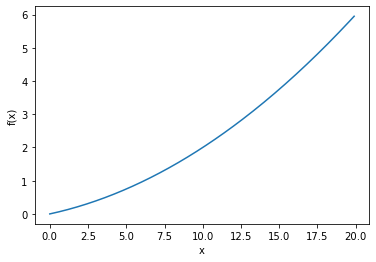

In [23]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1) #0에서 20까지 0.1 간격의 배열 x를 만들었다.(20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [26]:
numerical_diff(function_1,5) #x=5에서 미분

0.1999999999990898

In [27]:
numerical_diff(function_1,10) #x=10에서 미분

0.2999999999986347

### 4.3.3 편미분

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2

교재 p.125의 식 4.6을 코드로 구현했다.

In [29]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [30]:
numerical_diff(function_tmp1,3.0)

6.00000000000378

x0=3,x1=4일 때 x0에 대한 편미분을 구했다. (편미분이란 변수가 여럿인 함수에 대한 미분임.)

In [31]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [32]:
numerical_diff(function_tmp2,4.0)

7.999999999999119

x0=3,x1=4일 때 x1에 대한 편미분을 구했다.

## 4.4 기울기

모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다.

In [34]:
def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [35]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [36]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [37]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

세 점 (3,4), (0,2), (3,0) 에서의 기울기를 구했다.

### 4.4.1 경사법(경사 하강법)

경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법이다. 

경사법 수식은 교재 p.131 참고

In [39]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

경사하강법을 구현했다. f는 최적화하려는 함수, init_x는 초깃값, lr는 learning rate, step_num은 경사법에 따른 반복 횟수를 뜻한다. numerical_gradient(f,x)로 함수의 기울기를 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num 번 반복한다.

In [41]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

교재 p.132 문제 참고

In [42]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

학습률이 너무 커서 큰 값으로 발산해버렸다.

In [43]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률이 너무 작아서 거의 갱신되지 않은 채 끝났다. 따라서 학습률을 적절히 설정하는 것이 중요하다.
___
학습률 같은 매개변수를 하이퍼파라미터라고 한다. 이는 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수이다. 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 자동으로 획득되는 매개변수인 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수이다. 일반적으로 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

### 4.4.2 신경망에서의 기울기

신경망 학습에서도 기울기를 구해야 한다. 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.

In [46]:
import sys,os
import common
sys.path.append(os.pardir)
import numpy as np
from common.functions import sotfmax,cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

ModuleNotFoundError: No module named 'common'

In [47]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [48]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-0.23137266 -1.31462177 -1.26381367]
 [-0.55780548  0.36708365  0.43763876]]


In [49]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[-0.64084853 -0.45839778 -0.36441332]


In [50]:
np.argmax(p) # 최댓값의 인덱스

2

In [51]:
t = np.array([0,0,1]) # 정답 레이블

In [52]:
net.loss(x,t)

NameError: name 'softmax' is not defined